In [1]:
import numpy as np
import pandas as pd

# For preprocessing the data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# To build neural network
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from sklearn.metrics import accuracy_score

# To visualize the training process
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("aug_train.csv")
data = data.dropna()

In [3]:
data.loc[data['experience'] == '<1', 'experience'] = 0
data.loc[data['experience'] == '>20', 'experience'] = 21
data.loc[data['last_new_job'] == 'never', 'last_new_job'] = 0
data.loc[data['last_new_job'] == '>4', 'last_new_job'] = 5

In [4]:
data['experience'] = pd.to_numeric(data['experience'])
data['last_new_job'] = pd.to_numeric(data['last_new_job'])

In [5]:
# This function normalizes
def normalizer(data, cols):
    mean = data[cols].mean()
    data[cols] -= mean
    var = data[cols].var()
    data[cols] /= var
    return data, mean, var

In [6]:
# This part normalizes the numerical values and overwrites to data
columns = np.array(['training_hours', 'experience', 'last_new_job'])
stats = np.empty((3, 2))
for i in range(0, 3):
    data, stats[i, 0], stats[i, 1] = normalizer(data, columns[i])

In [7]:
# Numericals are added.
final = (data[['city_development_index', 'training_hours', 'experience', 'last_new_job']]).values


In [8]:
categoricals = np.array(['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type'])


In [9]:
# Categoricals are one hot encoded and added to final( Which stores processed values.)
for i in categoricals:
    values = np.array(data[i])
    label_encoder = LabelEncoder() # String values turn into numbers.
    integer_encoded = label_encoder.fit_transform(values)
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    final = np.hstack((final, onehot_encoder.fit_transform(integer_encoded)))

In [10]:
# Target is defined and one hot encoded.
target = data.iloc[:,13:14].values
target = onehot_encoder.fit_transform(target)

In [11]:
# Data are splitted for train and test.
values_train, values_test, target_train, target_test = train_test_split(final, target,test_size = 0.2)

In [12]:
# Model is created.
model = Sequential()
model.add(Dense(16, input_dim=151,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history = model.fit(values_train, target_train, validation_data = (values_test, target_test), epochs=100, batch_size=64)

Epoch 1/100
112/112 [==============================] - 1s 6ms/step - loss: 0.5646 - accuracy: 0.7296 - val_loss: 0.4252 - val_accuracy: 0.8353
Epoch 2/100
112/112 [==============================] - 0s 4ms/step - loss: 0.4392 - accuracy: 0.8343 - val_loss: 0.3966 - val_accuracy: 0.8353
Epoch 3/100
112/112 [==============================] - 1s 5ms/step - loss: 0.4143 - accuracy: 0.8357 - val_loss: 0.3771 - val_accuracy: 0.8353
Epoch 4/100
112/112 [==============================] - 1s 5ms/step - loss: 0.3999 - accuracy: 0.8391 - val_loss: 0.3660 - val_accuracy: 0.8358
Epoch 5/100
112/112 [==============================] - 1s 5ms/step - loss: 0.3917 - accuracy: 0.8430 - val_loss: 0.3582 - val_accuracy: 0.8409
Epoch 6/100
112/112 [==============================] - 0s 4ms/step - loss: 0.3822 - accuracy: 0.8458 - val_loss: 0.3535 - val_accuracy: 0.8459
Epoch 7/100
112/112 [==============================] - 0s 4ms/step - loss: 0.3782 - accuracy: 0.8444 - val_loss: 0.3514 - val_accuracy: 0.8476

Epoch 58/100
112/112 [==============================] - 1s 5ms/step - loss: 0.3430 - accuracy: 0.8607 - val_loss: 0.3539 - val_accuracy: 0.8587
Epoch 59/100
112/112 [==============================] - 1s 5ms/step - loss: 0.3416 - accuracy: 0.8604 - val_loss: 0.3554 - val_accuracy: 0.8593
Epoch 60/100
112/112 [==============================] - 0s 4ms/step - loss: 0.3425 - accuracy: 0.8599 - val_loss: 0.3548 - val_accuracy: 0.8604
Epoch 61/100
112/112 [==============================] - 0s 4ms/step - loss: 0.3393 - accuracy: 0.8631 - val_loss: 0.3557 - val_accuracy: 0.8599
Epoch 62/100
112/112 [==============================] - 0s 4ms/step - loss: 0.3414 - accuracy: 0.8604 - val_loss: 0.3548 - val_accuracy: 0.8615
Epoch 63/100
112/112 [==============================] - 0s 4ms/step - loss: 0.3396 - accuracy: 0.8615 - val_loss: 0.3558 - val_accuracy: 0.8615
Epoch 64/100
112/112 [==============================] - 0s 4ms/step - loss: 0.3403 - accuracy: 0.8631 - val_loss: 0.3556 - val_accuracy:

In [15]:
# This part tests our model
target_prediction = model.predict(values_test)
#Converting predictions to label
prediction = list()
for i in range(len(target_prediction)):
    prediction.append(np.argmax(target_prediction[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(target_test)):
    test.append(np.argmax(target_test[i]))

In [16]:
a = accuracy_score(prediction,test)
print('Accuracy is:', a*100)


Accuracy is: 85.81797878280291


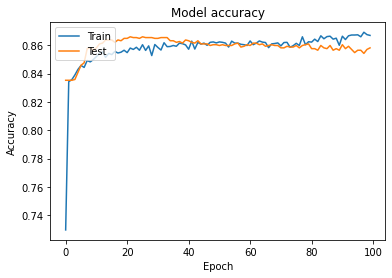

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

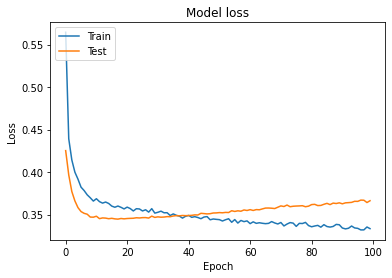

In [18]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()